<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [58]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [53]:
df.size

44590

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [57]:
df['YEAR'].nunique()

(1715, 26)

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [67]:
states = ['MICHIGAN', 'OHIO']
df_states = df[df.STATE.isin(states)]
df_states.groupby('STATE').AVG_MATH_8_SCORE.mean()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
STATE,,,,,,,,,,,,,,,,,,,,,
MICHIGAN,66067,38267781.0,421927280.0,33259927.0,232956123.0,155711230.0,425656146.0,202432437.0,135825021.0,19558704.0,...,3823380.0,3857123.0,3423069.0,19525809.0,10491363.0,52413647.0,2578.0,3314.0,2614.0,2635.0
OHIO,66067,42032299.0,453516109.0,31358298.0,188741219.0,233416592.0,444386156.0,221518935.0,145937414.0,18705252.0,...,4317261.0,4395224.0,3914252.0,21745475.0,11440764.0,57387114.0,2634.0,3387.0,2455.0,2677.0


Find the average for your outcome score across all states in 2019

Text(0.5, 1.0, '8th grade math score in 2019')

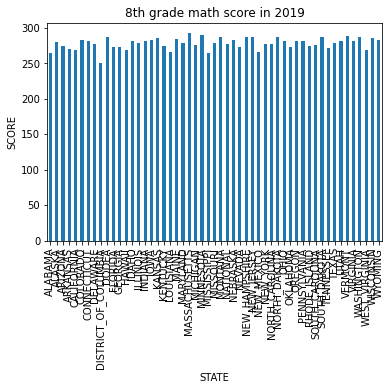

In [33]:
df.groupby('STATE').AVG_MATH_8_SCORE.mean().plot.bar()
plt.ylabel('SCORE')
plt.title('8th grade math score in 2019')

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

<AxesSubplot:xlabel='STATE'>

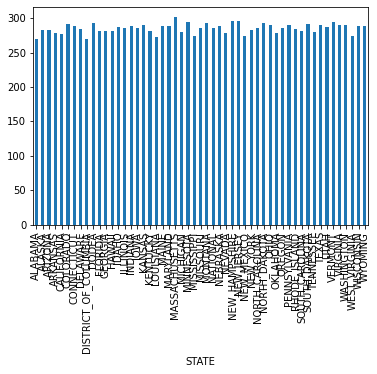

In [35]:
df.groupby('STATE').AVG_MATH_8_SCORE.max().plot.bar()
plt.ylabel('SCORE')
plt.title('Maximum outcome score for every state')

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [38]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

KeyError: 'ENROLL_ALL'

Final feature list: **<'ENROLL_8', 'STATE_REVENUE', and 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT>**

Feature selection justification: **<
'STATE_REVENUE': To see if students in each state will gain more resources due to the high revenue of that state
'ENROLL_8': To investigate if there's any correlation between the number of people and their performance
'SUPPPORT_SERVICES_EXPENDITURE_PER_STUDENT': To analyze how does the change of the expenditure per student can infleunce a student's performance
>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

KeyError: 'ENROLL_8'

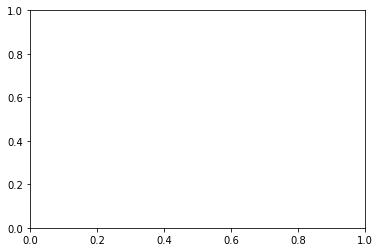

In [42]:
df.plot.scatter(x = 'ENROLL_8', y = 'AVG_MATH_8_SCORE')
plt.xlabel('8th grade enrollment')
plt.ylabel('8th grade math score')

**<The Relationship Between 8th Grade Student Enrollment and their Math Score**

**Visualization 2**

Text(0, 0.5, '8th grade math score')

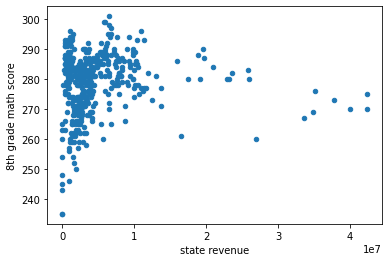

In [40]:
df.plot.scatter(x = 'STATE_REVENUE', y = 'AVG_MATH_8_SCORE')
plt.xlabel('state revenue')
plt.ylabel('8th grade math score')

**<The Correlation Between the State Revenue and the 8th Grade Math Score>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['ENROLL_8', 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 'STATE_REVENUE']],dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [ ]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [ ]:
# create your model here
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [43]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'STATE_REVENUE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')

NameError: name 'X_train' is not defined

<h2> Summary </h2>

**<Based on the data and the graph about the relationship between the state revenue and the average math scores from the 8th graders, both of them show that there is no correlation between these two variables. This statement can be concluded by two main situations. The first one is that most of the points that have high score in math appear when the instruction expenditure is quite low (between 0 and 1). The another part is that the the grade range from score below 240 and score above 270 all exist when the instruction expenditure is 0 to 1. On the other hand, less datapoint has been shown in the range of 1 to 4 for the instruction expenditure. These information all demonstrate that there is no directly correlation between the state revenue and the average math score from the 8th graders.>**